In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",30)

data = pd.read_csv("tmdb-movies.csv",parse_dates=["release_date"])
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [88]:
print(data.shape)
print(data.info())


(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genr

In [89]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

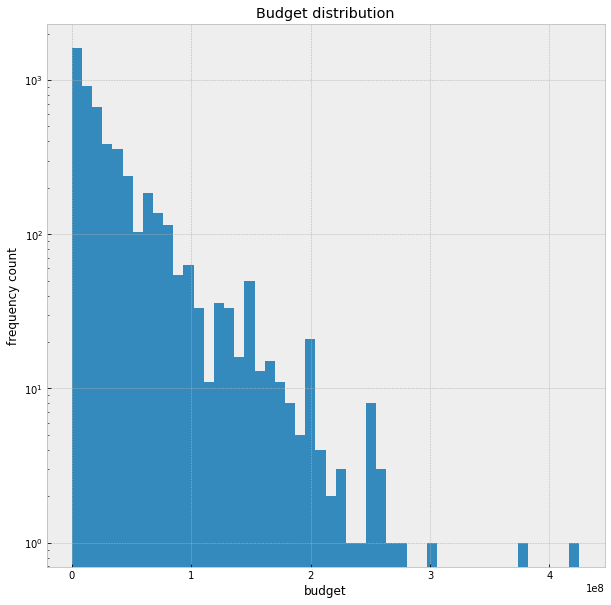

In [135]:
plt.figure(figsize=(10,10))
plt.style.use("bmh")


plt.hist(data["budget"],bins=50,log=True)
plt.title("Budget distribution")
plt.xlabel("budget")
plt.ylabel("frequency count")
plt.show()



C:\Users\allusers\AppData\Local\Programs\Python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


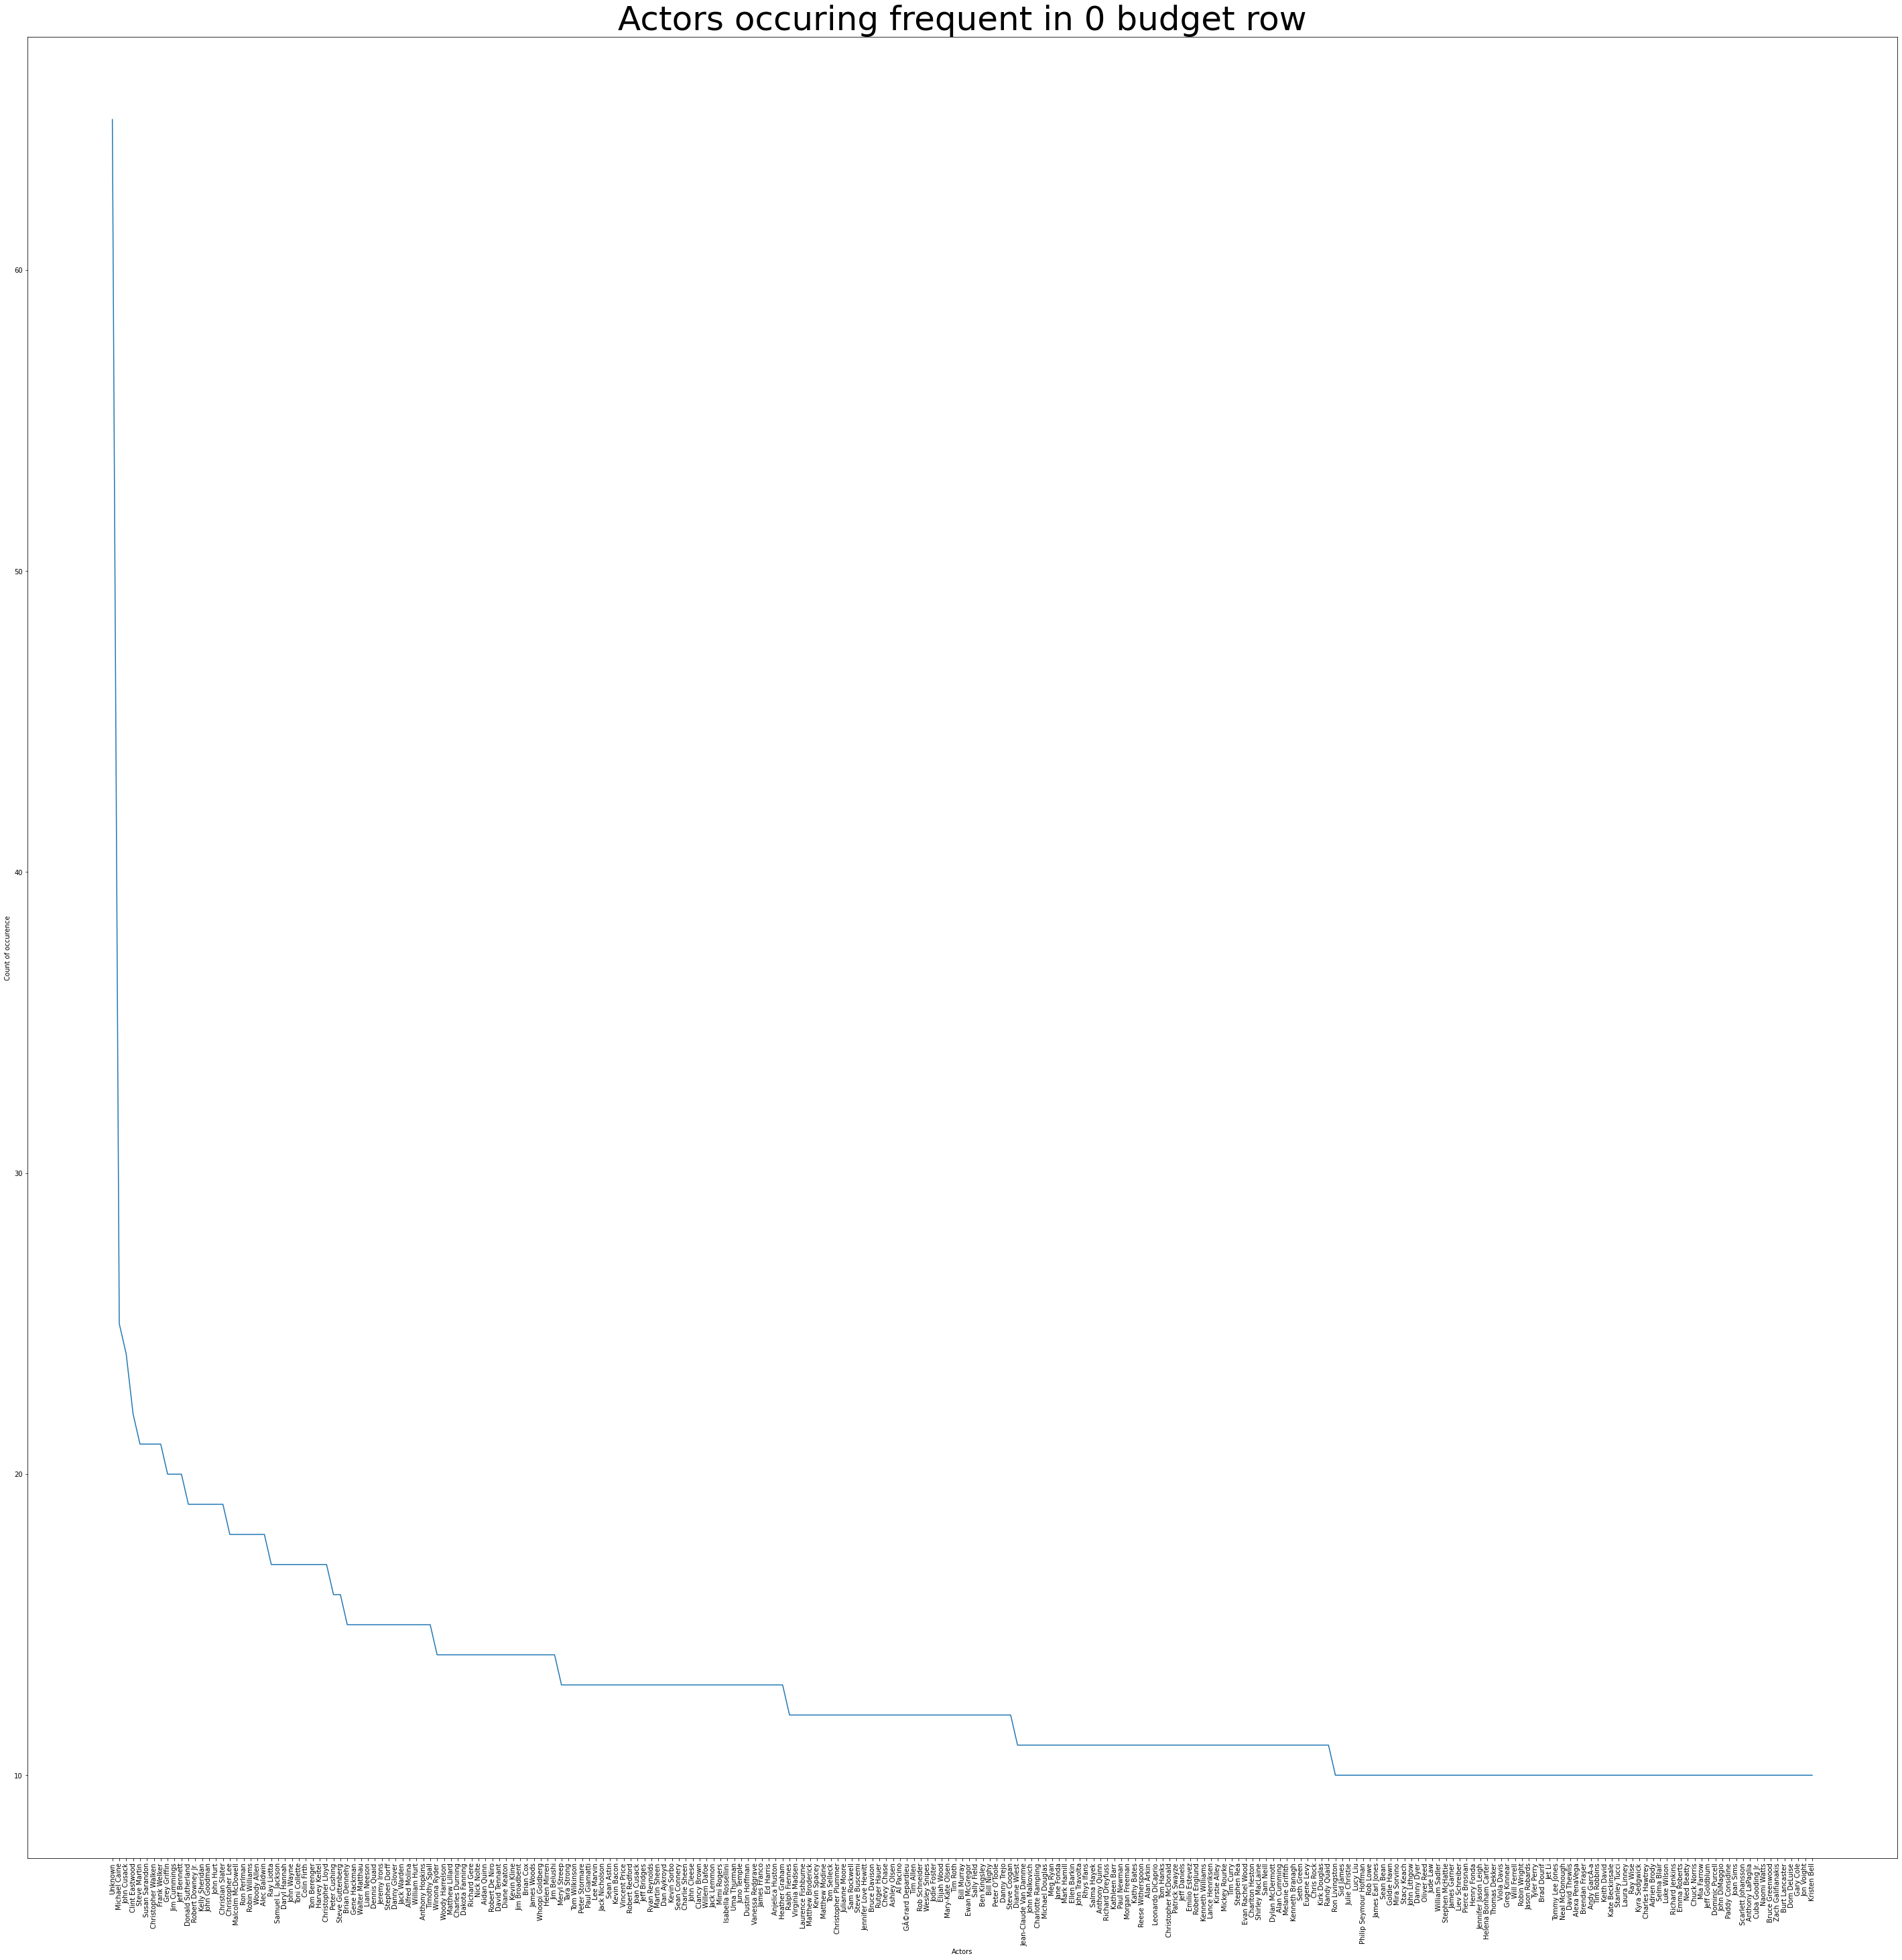

In [90]:
# #checking budget as per cast
data_1 = data.copy()
data_1["cast"].fillna("Unknown",inplace=True)
filt = (data_1["budget"]==0)
budget_ = data_1.loc[filt,["budget","cast"]].sort_values(by="budget")
budget_
cast_ = []
cast_log = {}
for cast in list(budget_.iloc[:,1].values):
    try:
        for i in cast.split("|"):
            cast_.append(i)
    except Exception as e:
        continue
for i in set(cast_):
    count_ = cast_.count(i)
    cast_log[i] = count_
cast_log

# taking castwhich occured atleast 10 times in movies containing 0 budget
cast_log_ = dict(sorted(cast_log.items(),key = lambda x:x[1],reverse=True)[:247])
cast_log_
try:
    plt.figure(figsize=(50,50))
    plt.title("Actors occuring frequent in 0 budget row",fontdict={"fontsize":50})
    sns.lineplot(list(cast_log_.keys()),list(cast_log_.values()),palette = "hls")
    plt.xlabel("Actors")
    plt.ylabel("Count of occurence")
    plt.xticks(rotation="90")
    plt.show()
except Exception as e:
    pass





In [91]:
#updating mean of those value instead of 0

filt = (data["cast"].str.contains("|".join(list(cast_log_.keys()))) & (data['budget']!=0))

data.loc[(data["budget"]==0),["budget"]] = data.loc[filt,["budget"]].mean()

In [92]:
data[["budget","original_title"]].nsmallest(10,"budget")

,budget,original_title
1151,1.0,Fear Clinic
2618,1.0,Lost & Found
3065,1.0,"Angus, Thongs and Perfect Snogging"
3581,1.0,"Love, Wedding, Marriage"
8944,2.0,Death Wish 2
2398,3.0,Boy
3765,3.0,Death of a Superhero
10050,3.0,Tales from the Darkside: The Movie
1313,5.0,Des Lendemains Qui Chantent
8235,6.0,Tales from the Hood


In [93]:
data["budget"].value_counts(normalize=True)

20000000.0    0.036750
15000000.0    0.035397
25000000.0    0.034429
10000000.0    0.034043
30000000.0    0.031915
                ...   
125687.0      0.000193
145786.0      0.000193
12700000.0    0.000193
12800000.0    0.000193
17080000.0    0.000193
Name: budget, Length: 556, dtype: float64

Top movies in terms of high budget

In [94]:
data.nlargest(5,'budget').loc[:,["budget","original_title"]]

,budget,original_title
2244,425000000.0,The Warrior's Way
3375,380000000.0,Pirates of the Caribbean: On Stranger Tides
7387,300000000.0,Pirates of the Caribbean: At World's End
14,280000000.0,Avengers: Age of Ultron
6570,270000000.0,Superman Returns


Third highest budget movie ---> Pirates of the Caribbean: At World's End

Top movies in terms of low budget

In [95]:
data.nsmallest(5,'budget').loc[:,["budget","original_title"]]

,budget,original_title
1151,1.0,Fear Clinic
2618,1.0,Lost & Found
3065,1.0,"Angus, Thongs and Perfect Snogging"
3581,1.0,"Love, Wedding, Marriage"
8944,2.0,Death Wish 2


Third lowest budget movie ---> Angus, Thongs and Perfect Snogging

In [96]:
filt =((data["release_date"] > '2000-1-1') & (data["release_date"] < '2005-12-31'))
name_data = data.loc[filt,["original_title"]].apply(lambda x:x.str.split(" "))

word_count = 0

for name in name_data["original_title"]:
    word_count+=len(name)
    
print("WORD COUNT OF TITLE OF MOVIES 2000-2005 \n")
print(f"Total word count of movies title {word_count}")
print("--"*30)
print("--"*30)
print("Average word count of moviestitle  %1.1f"%(word_count/len(name_data)))



WORD COUNT OF TITLE OF MOVIES 2000-2005 

Total word count of movies title 4833
------------------------------------------------------------
------------------------------------------------------------
Average word count of moviestitle  2.9


In [97]:
filt = (data.cast.isna())
data.loc[filt,"cast"] = "Unknown"

C:\Users\allusers\AppData\Local\Programs\Python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


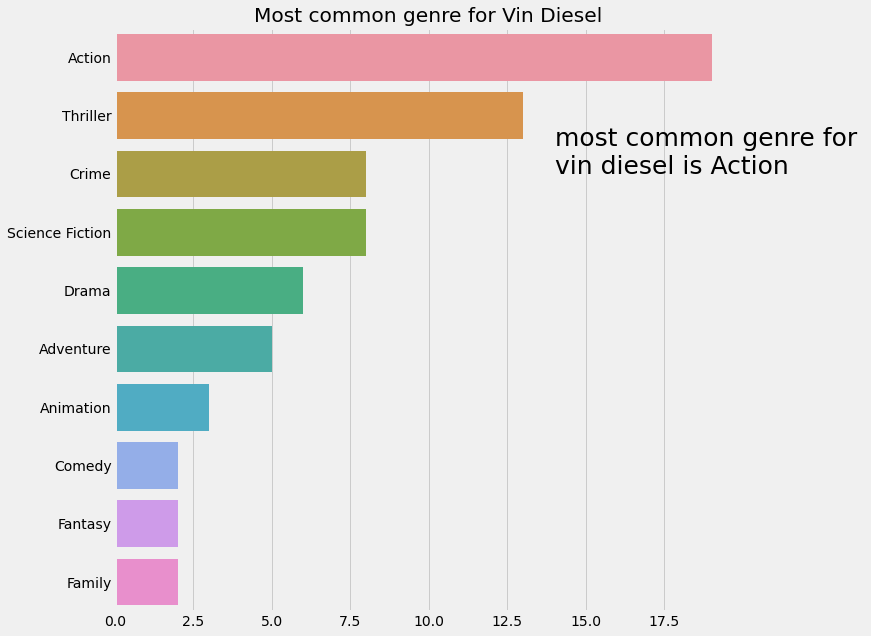

In [146]:
#checking most common genres for vin diesel

filt = (data.cast.str.contains("Vin Diesel"))

vin_data = data.loc[filt,"genres"].apply(lambda x:x.split("|"))
genres_ = set()
total_list = []

for gen in vin_data.tolist():
    for i in gen:
        total_list.append(i)
        genres_.add(i)
genres_


most_common = dict.fromkeys(genres_)
for gen in genres_:
    most_common[gen] = total_list.count(gen)
    
most_common = dict(sorted(most_common.items(),key=lambda x:x[1],reverse=True))
    
try:    
    plt.figure(figsize=(10,10))
    sns.barplot(list(most_common.values()),list(most_common.keys()))
    plt.title("Most common genre for Vin Diesel")
    plt.text(14,2,"most common genre for \nvin diesel is Action",fontdict={"fontsize":25})
    plt.show()
except Exception as e:
    pass

C:\Users\allusers\AppData\Local\Programs\Python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


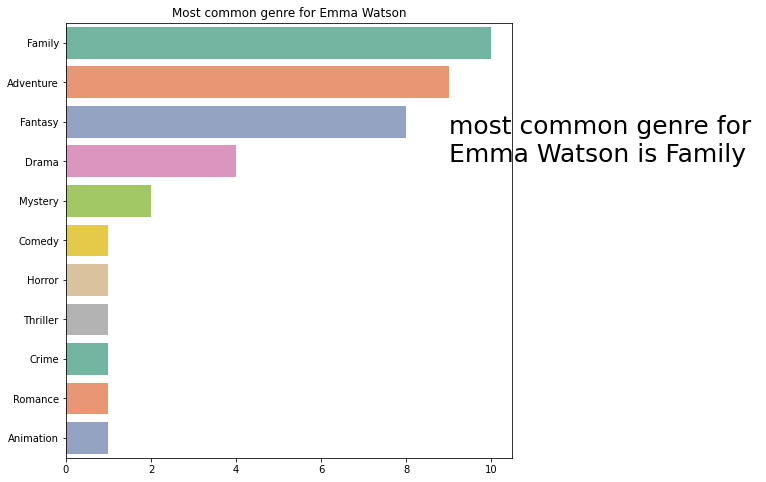

In [101]:
#checking most common genre for Emma Watson
data["cast"].fillna("Unknown",inplace=True)
filt = (data.cast.str.contains("Emma Watson"))

Emm_data = data.loc[filt,"genres"].apply(lambda x:x.split("|"))
genres_ = set()
total_list = []

for gen in Emm_data.tolist():
    for i in gen:
        total_list.append(i)
        genres_.add(i)
genres_


most_common = dict.fromkeys(genres_)
for gen in genres_:
    most_common[gen] = total_list.count(gen)

most_common = dict(sorted(most_common.items(),key=lambda x:x[1],reverse=True))

try:
    plt.figure(figsize=(8,8))
    sns.barplot(list(most_common.values()),list(most_common.keys()),palette="Set2")
    plt.title("Most common genre for Emma Watson")
    plt.text(9,3,"most common genre for \nEmma Watson is Family",fontdict={"fontsize":25})
    plt.show()
except Execption as e:
    pass

In [108]:
#checking for movie with highest revenue
data.loc[:,["revenue","original_title"]].sort_values(by="revenue",ascending=False)

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World
...,...,...
1164,0,Jamie Marks Is Dead
5421,0,Les Randonneurs
5419,0,Le Pari
5418,0,Jack Frost


Movie with highest revenue ---> Avatar

In [147]:
#checking for movie with least revenue
filt = (data["revenue"] > 0)

data.loc[filt,["revenue","original_title"]].sort_values(by="revenue",ascending=True)

,revenue,original_title
5067,2,Shattered Glass
8142,2,Mallrats
1380,3,The Sentinel
3239,3,Dr. Horrible's Sing-Along Blog
10607,3,Soylent Green
...,...,...
0,1513528810,Jurassic World
4361,1519557910,The Avengers
5231,1845034188,Titanic
3,2068178225,Star Wars: The Force Awakens


Movie with least revenue ---> Manos: The Hands of Fate (0 revenue)

Movie with least revenue ---> Shattered Glass (2 revenue)

In [15]:
#checking average runtime of movies in the year 2006
filt = (data["release_year"] == 2006)
mean_ = data.loc[filt,["runtime"]].mean()

print("average runtime of movie in 2006:\n%.2f"%mean_)

average runtime of movie in 2006:
101.68


In [223]:
#checking which director has max vote count as per each year
director_ = data.groupby(["release_year","director"])["vote_count"].sum()
director_1 = pd.DataFrame(director_)
director_1.sort_values(by=["release_year","vote_count"],ascending=[True,False],inplace=True)

famous_director = []
for e,i in enumerate(director_1.index):
    try:
        if i[0] != director_1.index[e-1][0]:
            famous_director.append(i)
    except Exceptions as e:
        pass
famous_director = dict(famous_director)
famous_director


{1960: 'Alfred Hitchcock',
 1961: 'Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman',
 1962: 'Terence Young',
 1963: 'Wolfgang Reitherman',
 1964: 'Stanley Kubrick',
 1965: 'Robert Wise',
 1966: 'Chuck Jones|Ben Washam',
 1967: 'Wolfgang Reitherman',
 1968: 'Stanley Kubrick',
 1969: 'George Roy Hill',
 1970: 'Wolfgang Reitherman',
 1971: 'Stanley Kubrick',
 1972: 'Francis Ford Coppola',
 1973: 'William Friedkin',
 1974: 'Francis Ford Coppola',
 1975: 'MiloÅ¡ Forman',
 1976: 'Martin Scorsese',
 1977: 'George Lucas',
 1978: 'Randal Kleiser',
 1979: 'Ridley Scott',
 1980: 'Irvin Kershner',
 1981: 'Steven Spielberg',
 1982: 'Ridley Scott',
 1983: 'Richard Marquand',
 1984: 'James Cameron',
 1985: 'Robert Zemeckis',
 1986: 'James Cameron',
 1987: 'Stanley Kubrick',
 1988: 'John McTiernan',
 1989: 'Robert Zemeckis',
 1990: 'Tim Burton',
 1991: 'James Cameron',
 1992: 'Ron Clements|John Musker',
 1993: 'Steven Spielberg',
 1994: 'Frank Darabont',
 1995: 'David Fincher',
 1996: 'Roland Emmeri

C:\Users\allusers\AppData\Local\Programs\Python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


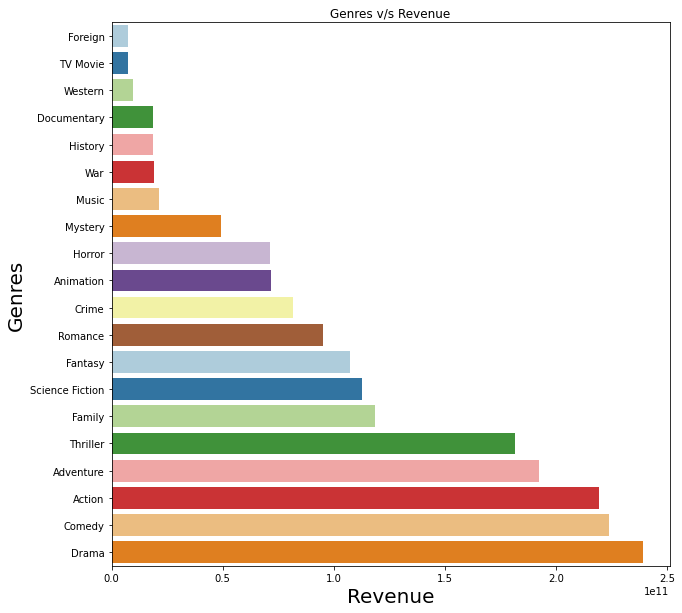

In [192]:
# # # #checking which genre movie has earned more revenue
data_2 = data.copy()
data_2.loc[(data["revenue"]==0),["revenue"]] = data["revenue"].mean()
gen_set = set()
genres_col = data_2.loc[:,"genres"].unique().tolist()
for gen in genres_col:
    try:
        for i in gen.split("|"):
            gen_set.add(i)
    except Exception as e:
        pass
gen_set

genres_revenue_data = {}
for gen in gen_set:
    data_2[gen] = np.where(data_2["genres"].str.contains(gen),1,0)
    genres_revenue_data[gen] = data_2.loc[(data_2[gen] == 1),["revenue"]].sum().tolist()[0]
data_2

genres_revenue_data = dict(sorted(list(genres_revenue_data.items()),key=lambda x:x[1]))



try:
    plt.figure(figsize=(10,10))
    sns.barplot(list(genres_revenue_data.values()),list(genres_revenue_data.keys()),palette="Paired")
    plt.xlabel("Revenue",fontdict={"fontsize":20})
    plt.ylabel("Genres",fontdict = {"fontsize":20})
    plt.title("Genres v/s Revenue")
    plt.show()
except Exception as e:
    print(e)

In [98]:
## checking most popular cast
data_3 = data.copy()
data_3.loc[data_3["cast"].isna()] = "Unknown"
cast_= set()
for cast in data_3["cast"].unique().tolist():
    for i in cast.split("|"):
        cast_.add(i)
cast_
most_popular_cast_ = dict.fromkeys(cast_)
try:
    for cast in cast_:
        filt = (data_3["cast"].str.contains(cast))
        most_popular_cast_[cast] = data_3.loc[filt,"popularity"].sum()
except Exception as e:  
    print(e)  
    
most_popular_cast_ = dict(sorted(list(most_popular_cast_.items()),key=lambda x:x[1],reverse=True))

In [99]:
most_popular_cast_

{'Adam': 230.1616590000001,
 'Samuel L. Jackson': 94.612089,
 'Michael Caine': 83.40645599999996,
 'Harrison Ford': 80.13813800000001,
 'Robert De Niro': 78.091718,
 'Bruce Willis': 77.46036799999999,
 'Brad Pitt': 74.73642600000001,
 'Mars': 73.89464199999998,
 'Johnny Depp': 71.81357299999999,
 'Scarlett Johansson': 68.154523,
 'Tom Hardy': 67.88334699999999,
 'Tom Hanks': 66.54026999999999,
 'Liam Neeson': 64.008212,
 'Leonardo DiCaprio': 63.65239899999998,
 'Anne Hathaway': 63.314649,
 'Keanu Reeves': 62.091378999999996,
 'Ian McKellen': 61.067864,
 'Arnold Schwarzenegger': 60.901409999999984,
 'Nicolas Cage': 60.375777000000014,
 'Ralph Fiennes': 59.906532999999975,
 'Tom Cruise': 59.140741000000006,
 'Charlize Theron': 58.90978400000001,
 'Morgan Freeman': 58.90338199999999,
 'Jason Statham': 58.161400999999984,
 'Robert Downey Jr.': 56.644144000000004,
 'Gary Oldman': 56.06194199999999,
 'Chris Pratt': 55.947193999999996,
 'Matt Damon': 55.211053999999976,
 'Chris Evans': 55.114

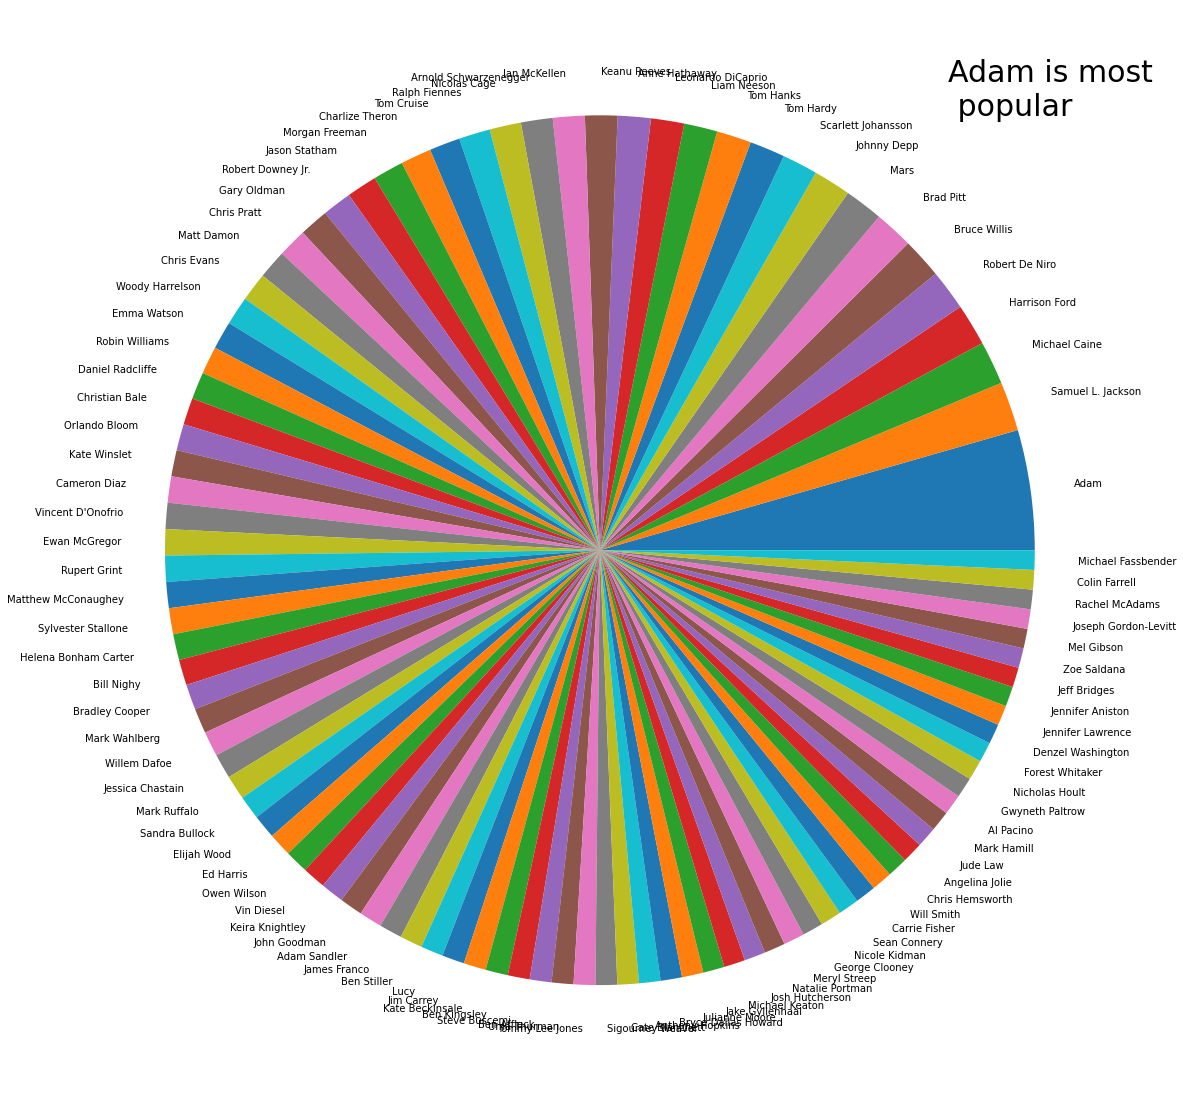

In [109]:
#taking top 100 popular cast
top_100_popular_cast = dict(list(most_popular_cast_.items())[:100])

try:
    plt.figure(figsize=(20,20))
    plt.pie(list(top_100_popular_cast.values()),labels=list(top_100_popular_cast.keys()))
    plt.text(0.8,1,"Adam is most\n popular",fontdict={"fontsize":30})
    plt.show()
except Exception as e:
    print(e)


In [245]:
#cheking average runtime of movies wrt to each year
data_4 = data.copy()
data_4.groupby(["release_year"])["runtime"].mean()


release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    112.048780
1971    107.727273
1972    101.950000
1973    103.527273
1974    105.617021
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.781022
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.548571
1996    105.705882
1997    106.505208
1998    105.061905
1999    108.861607
2000    103.779736
2001    108.033058
2002    106.864662
2003    100.679715
2004    105.364821
2005    102.686813
2006    101.683824
2007    100.410959
2008    100.280242
2009     98.050657
2010     98.120408
2011     97.922222